# **Basic Python**

## 1.a 
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [ ]:
def F(n):
    alphabet = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
    for i in range(n):
        left_padding = '-' * (n - i - 1)
        middle_sequence = alphabet[i] + ''.join(alphabet[i - 1::-1]) if i > 0 else alphabet[i]
        right_padding = '-' * (n - i - 1)
        line = f"{left_padding}{middle_sequence}{right_padding}"
        print(line)

# Tests
print("Output for F(10):")
F(10)

print("\nOutput for F(6):")
F(6)

## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [35]:
def F(d):
    sorted_keys = sorted(d)
    sorted_by_x_desc = sorted(d.items(), key=lambda item: item[1][0], reverse=True)
    sorted_by_y_asc = sorted(d.items(), key=lambda item: item[1][1])

    print("Sorted by keys (ascending):")
    for key in sorted_keys:
        value_x, value_y = d[key]
        print(f"-{key}-, -{value_x}-, -{value_y}-")

    print("\nSorted by x values (descending):")
    for key, (value_x, value_y) in sorted_by_x_desc:
        print(f"-{key}-, -{value_x}-, -{value_y}-")

    print("\nSorted by y values (ascending):")
    for key, (value_x, value_y) in sorted_by_y_asc:
        print(f"-{key}-, -{value_x}-, -{value_y}-")

# Tests
F({1: (1, 2), 2: (-1, 4), 5: (-4, 3), 4: (2, 3)})
F({-8: (4, 2), 6: (-3, 4), 7: (2, 1), 5: (9, -10)})


Sorted by keys (ascending):
-1-, -1-, -2-
-2-, --1-, -4-
-4-, -2-, -3-
-5-, --4-, -3-

Sorted by x values (descending):
-4-, -2-, -3-
-1-, -1-, -2-
-2-, --1-, -4-
-5-, --4-, -3-

Sorted by y values (ascending):
-1-, -1-, -2-
-5-, --4-, -3-
-4-, -2-, -3-
-2-, --1-, -4-
Sorted by keys (ascending):
--8-, -4-, -2-
-5-, -9-, --10-
-6-, --3-, -4-
-7-, -2-, -1-

Sorted by x values (descending):
-5-, -9-, --10-
--8-, -4-, -2-
-7-, -2-, -1-
-6-, --3-, -4-

Sorted by y values (ascending):
-5-, -9-, --10-
-7-, -2-, -1-
--8-, -4-, -2-
-6-, --3-, -4-


## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


#### 2.a: open the student_records.csv file and print out the first 10 rows

In [36]:
import csv


csv_file_path = r"C:\Users\divya\Downloads\student_records.csv"


with open(csv_file_path, "r") as csv_file:
    csv_reader = csv.reader(csv_file)
    headers = next(csv_reader)
    print("Header:", ", ".join(headers))

    print("\nFirst 10 rows:")
    for index, record in enumerate(csv_reader):
        if index < 10:
            print(", ".join(record))
        else:
            break

Header: roll_number, department, credit, course_name, course_type, grade

First 10 rows:
588946, MA, 3, EC250, hasmed_elective, AB
145372, EP, 4, EP407, hasmed_elective, CC
834515, MA, 8, EP885, hasmed_elective, BB
344265, CSE, 6, CSE699, honours, AB
358405, MA, 3, EE460, minor, AP
781075, CE, 8, CE540, honours, CC
180828, CSE, 6, CE880, minor, AB
981238, MM, 4, CSE226, minor, AB
836881, MM, 8, MM530, core, AA
310604, EE, 8, EE202, core, AB


#### 2.b: Print out the total credits and calculte CPI of each student. 
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=8, BC=7, CC=6)

In [37]:
import csv

grades_weight = {"AP": 10, "AA": 10, "AB": 9, "BB": 8, "BC": 7, "CC": 6}
csv_path = r"C:\Users\divya\Downloads\student_records.csv"

student_cpi = {}

with open(csv_path, "r") as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for record in csv_reader:
        roll_no = record["roll_number"]
        course_credit = int(record["credit"])
        student_grade = record["grade"]
        if roll_no not in student_cpi:
            student_cpi[roll_no] = {"credits": 0, "weighted_sum": 0}
        student_cpi[roll_no]["credits"] += course_credit
        student_cpi[roll_no]["weighted_sum"] += grades_weight[student_grade] * course_credit

print("Roll Number | Total Credits | CPI")
for roll_no, details in student_cpi.items():
    credits = details["credits"]
    weighted_sum = details["weighted_sum"]
    cpi = weighted_sum / credits if credits > 0 else 0
    print(f"{roll_no} | {credits} | {cpi:.2f}")



Roll Number | Total Credits | CPI
588946 | 199 | 8.69
145372 | 173 | 7.75
834515 | 199 | 8.22
344265 | 153 | 8.70
358405 | 206 | 8.59
781075 | 246 | 8.17
180828 | 177 | 8.10
981238 | 168 | 8.24
836881 | 246 | 8.39
310604 | 198 | 8.33
847809 | 261 | 8.21
773982 | 264 | 8.07
500658 | 208 | 8.17
810863 | 192 | 8.15
124663 | 229 | 8.13
364146 | 225 | 8.40
871746 | 216 | 8.21
270007 | 241 | 8.03
597353 | 200 | 8.12
986057 | 199 | 8.07
718510 | 184 | 8.43
836431 | 160 | 7.90
379479 | 260 | 8.25
582912 | 221 | 8.66
788020 | 193 | 8.02
613401 | 209 | 8.44
144528 | 228 | 8.16
485484 | 216 | 8.36
680096 | 153 | 8.05
199713 | 172 | 8.29
851029 | 161 | 8.32
845623 | 237 | 8.38
150503 | 173 | 8.29
214270 | 229 | 7.88
517837 | 205 | 8.58
482623 | 254 | 8.40
721490 | 235 | 8.34
955757 | 251 | 8.29
589528 | 153 | 8.73
143856 | 201 | 8.49
571782 | 217 | 8.42
973158 | 193 | 8.51
703403 | 254 | 8.34
960395 | 262 | 8.63
521087 | 223 | 7.91
461971 | 252 | 8.29
879634 | 203 | 8.74
716985 | 185 | 8.18
194063

#### 2.c: Print out the roll numbers of all students who meet the graduation requirements 
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [38]:
import csv

csv_path = r"C:\Users\divya\Downloads\student_records.csv"

graduation_requirements = {
    "core": 20,
    "department_elective": 15,
    "flexible_elective": 10,
    "hasmed_elective": 5,
}

credits_summary = {}

with open(csv_path, "r") as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for record in csv_reader:
        student_id = record["roll_number"]
        course_category = record["course_type"]
        course_credits = int(record["credit"])

        if student_id not in credits_summary:
            credits_summary[student_id] = {
                "core": 0,
                "department_elective": 0,
                "flexible_elective": 0,
                "hasmed_elective": 0,
            }

        if course_category in credits_summary[student_id]:
            credits_summary[student_id][course_category] += course_credits

eligible_roll_numbers = []
for student_id, earned_credits in credits_summary.items():
    if all(
        earned_credits.get(req_type, 0) >= graduation_requirements[req_type]
        for req_type in graduation_requirements
    ):
        eligible_roll_numbers.append(student_id)

print("Roll numbers of students meeting graduation requirements:")
print(eligible_roll_numbers)


Roll numbers of students meeting graduation requirements:
['588946', '834515', '781075', '180828', '981238', '836881', '310604', '773982', '500658', '810863', '124663', '871746', '986057', '379479', '144528', '485484', '845623', '150503', '214270', '517837', '482623', '721490', '955757', '143856', '571782', '973158', '703403', '960395', '521087', '461971', '879634', '716985', '265922', '283796', '203200', '327122', '534763', '391848', '971123', '207443', '488661', '782129', '928288', '581858', '282482', '572815', '608952', '628849', '630568', '388969', '159438', '970791', '143142', '998293', '681499', '888886', '608522', '362471', '692318', '626000', '581065', '787967', '381227', '750259', '881983', '294697']


#### 2.d: Print out the roll numbers of all students who completed a minor 
Atleast 10 credits with minor tag in a specific department

In [39]:
import csv

csv_path = r"C:\Users\divya\Downloads\student_records.csv"

minor_course_credits = {}

with open(csv_path, "r") as csv_file:
    csv_reader = csv.DictReader(csv_file)
    for record in csv_reader:
        student_id = record["roll_number"]
        dept = record["department"]
        course_category = record["course_type"]
        credit_hours = int(record["credit"])

        if course_category == "minor":
            if student_id not in minor_course_credits:
                minor_course_credits[student_id] = {}

            if dept not in minor_course_credits[student_id]:
                minor_course_credits[student_id][dept] = 0

            minor_course_credits[student_id][dept] += credit_hours

students_with_minors = []
for student_id, dept_credits in minor_course_credits.items():
    for dept, total_credits in dept_credits.items():
        if total_credits >= 10:
            students_with_minors.append(student_id)
            break

print("Roll numbers of students who completed a minor:")
print(students_with_minors)


Roll numbers of students who completed a minor:
['358405', '180828', '981238', '847809', '270007', '781075', '986057', '124663', '364146', '517837', '721490', '150503', '571782', '716985', '194063', '265922', '482623', '329535', '207443', '810863', '973158', '143142', '970791', '907454', '888886', '608522', '608952', '143856', '773982', '960395', '283796', '461584', '879634', '597353', '845623', '465496', '718510', '534763', '680096', '836881', '787967', '344265', '581858', '391848', '485484', '775967', '138296', '381526', '681499', '816041', '971123', '199713', '630568', '379479', '362471', '703403', '388969', '836431', '582912', '381227', '478606', '159438', '733782', '782129', '144528', '851029', '881983', '458200', '998293', '628849', '995208', '613401', '301135', '500658', '488661', '788020', '626000', '955757', '841365', '750259', '572815', '521087', '214270', '461971', '692318', '145372', '588946', '834515', '208100', '871746', '327122', '581065', '203200', '294697', '993835', '

#### 2.e: Print out the roll numbers of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [40]:
import csv

csv_file_path = r"C:\Users\divya\Downloads\student_records.csv"

credits_by_student = {}

with open(csv_file_path, "r") as file:
    csv_reader = csv.DictReader(file)
    for record in csv_reader:
        student_id = record["roll_number"]
        course_category = record["course_type"]
        course_credit = int(record["credit"])

        if student_id not in credits_by_student:
            credits_by_student[student_id] = {"honours": 0, "core": 0}

        if course_category in credits_by_student[student_id]:
            credits_by_student[student_id][course_category] += course_credit

honours_eligible_students = []
for student_id, credit_summary in credits_by_student.items():
    if credit_summary["honours"] >= 10 and credit_summary["core"] >= 20:
        honours_eligible_students.append(student_id)

print("Roll numbers of students who completed an honours:")
print(honours_eligible_students)

Roll numbers of students who completed an honours:
['588946', '145372', '834515', '781075', '836881', '310604', '773982', '500658', '810863', '124663', '364146', '871746', '986057', '718510', '379479', '582912', '788020', '613401', '144528', '485484', '199713', '845623', '150503', '214270', '517837', '482623', '721490', '955757', '589528', '143856', '571782', '973158', '703403', '960395', '521087', '461971', '879634', '716985', '265922', '283796', '203200', '327122', '534763', '391848', '971123', '207443', '488661', '782129', '928288', '581858', '282482', '572815', '608952', '628849', '630568', '388969', '159438', '870642', '970791', '143142', '998293', '681499', '888886', '608522', '362471', '465496', '208100', '692318', '626000', '458200', '581065', '787967', '750259', '881983', '294697']


# **SciPy** 

## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [44]:
from scipy.optimize import minimize

def target_function(values):
    return 2 * (values[0] - values[1] - 3)**2 + 4 * (values[0] + 2 * values[1] + 1)**4

constraints = [
    {'type': 'ineq', 'fun': lambda v: v[0] - v[1] + 3},
    {'type': 'ineq', 'fun': lambda v: 5 - ((v[0] + 2)**2 + (v[1] + 1)**2)}
]

guess = [0, 0]

result = minimize(target_function, guess, method='SLSQP', constraints=constraints)

if result.success:
    print("Optimization was successful!")
    print(f"Optimal value of x and y: {result.x}")
    print(f"Minimum value of the objective function: {result.fun}")
else:
    print("Optimization failed!")
    print(f"Reason: {result.message}")



Optimization was successful!
Optimal value of x and y: [ 0.23492503 -0.92851489]
Minimum value of the objective function: 7.345026216976594


# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [43]:
import numpy as np
from scipy.integrate import quad

def parametric_integral(theta):
    r = 3**0.5
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    function_value = x**2 + y**4
    arc_length = r
    return function_value * arc_length

integral_value, integration_error = quad(parametric_integral, 0, 2 * np.pi)

print(f"The value of the line integral is: {integral_value:.4f}")


The value of the line integral is: 53.0536


# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [47]:
import time 
import numpy as np
import matplotlib.pyplot as plt

In [48]:
### TODO 1
def load_data(data_path):
    try:
        loaded_data = np.loadtxt(data_path, delimiter=",")
        return loaded_data
    except Exception as error:
        print(f"Error loading data from {data_path}: {error}")
        return None

In [49]:
### TODO 2.1
def initialise_centers(data, K, init_centers=None):
    if init_centers is None:
        indices = np.random.choice(data.shape[0], size=K, replace=False)
        return data[indices]
    return init_centers



In [50]:
### TODO 2.2
def initialise_labels(data):
    return np.ones(len(data), dtype=int)


In [51]:
### TODO 3.1 : E step
def calculate_distances(data, centers):
    return np.sqrt(((data[:, np.newaxis] - centers[np.newaxis, :])**2).sum(axis=2))



In [52]:
### TODO 3.2
def update_labels(distances):
    return np.argmin(distances, axis=1)

In [53]:
### TODO 4 : M step
def update_centers(data, labels, K):
    return np.vstack([data[labels == cluster_idx].mean(axis=0) for cluster_idx in range(K)])




In [54]:

### TODO 6 : Check convergence
def check_termination(labels1, labels2):
    return np.all(labels1 == labels2)

In [55]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path: str, K: int, init_centers):
    data = load_data(data_path)
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)
    start_time = time.time()
    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new):
            break
        else:
            labels = labels_new
    end_time = time.time()
    return centers, labels, end_time - start_time

In [56]:
### TODO 7
def visualise(data_path, labels, centers):
    data = load_data(data_path)
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
    plt.scatter(centers[:, 0], centers[:, 1], color='black', s=200, alpha=0.7)
    plt.title('K-means clustering')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.savefig('kmeans.png')
    plt.show()



Time taken for the algorithm to converge: 0.0


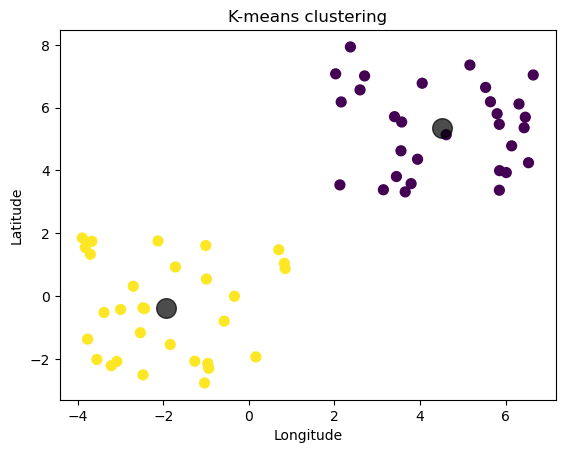

In [57]:
### After you have completed the above functions, run the following code to generate the plot
data_path = r"C:\Users\divya\Downloads\spice_locations.txt"
r"C:\Users\divya\Downloads\student_records.csv"
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)
